In [ ]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [51]:
import os
import pandas as pd 
import numpy as np
from fastai.tabular.all import *
from tqdm.notebook import tqdm 
import plotly.express as px 
from matplotlib import style 
import matplotlib.pyplot as plt
import seaborn as sns
from utils import get_indicators, RandomForest, lookback_data, get_rmse
from train_tabular import train_model, get_preds, split_df
from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch


# update pandas settings to supress scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = 999

# set the style of the plots
style.use('ggplot')


In [70]:
path = "datasets/Furniture.csv"

# Create a DataFrame
df = pd.read_csv(path, low_memory=False)    

df.head()

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543,181.611,40,16.899,105,27.796,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165
1,477.821,385.034,7,19.419,192,26.944,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002
2,379.397,276.737,32,27.059,59,21.948,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560
3,319.396,281.841,48,11.758,45,11.010,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.074
4,120.208,69.744,19,41.981,35,3.184,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.256


In [ ]:
categorical_cols = ["category", "season", "store_type", "brand","color","location","material"]

if categorical_cols:
    dummies = pd.get_dummies(df[categorical_cols], drop_first=True)
    df.drop(columns=categorical_cols, inplace=True)
    df = pd.concat([df, dummies], axis=1)

In [66]:
y_col = "sales"
exclude = [y_col, 'revenue']
x_cols = [col for col in df.columns if col not in exclude]

In [67]:
rf = RandomForest(df, x_cols, y_col)

In [68]:
rf.plot_feature_importance()

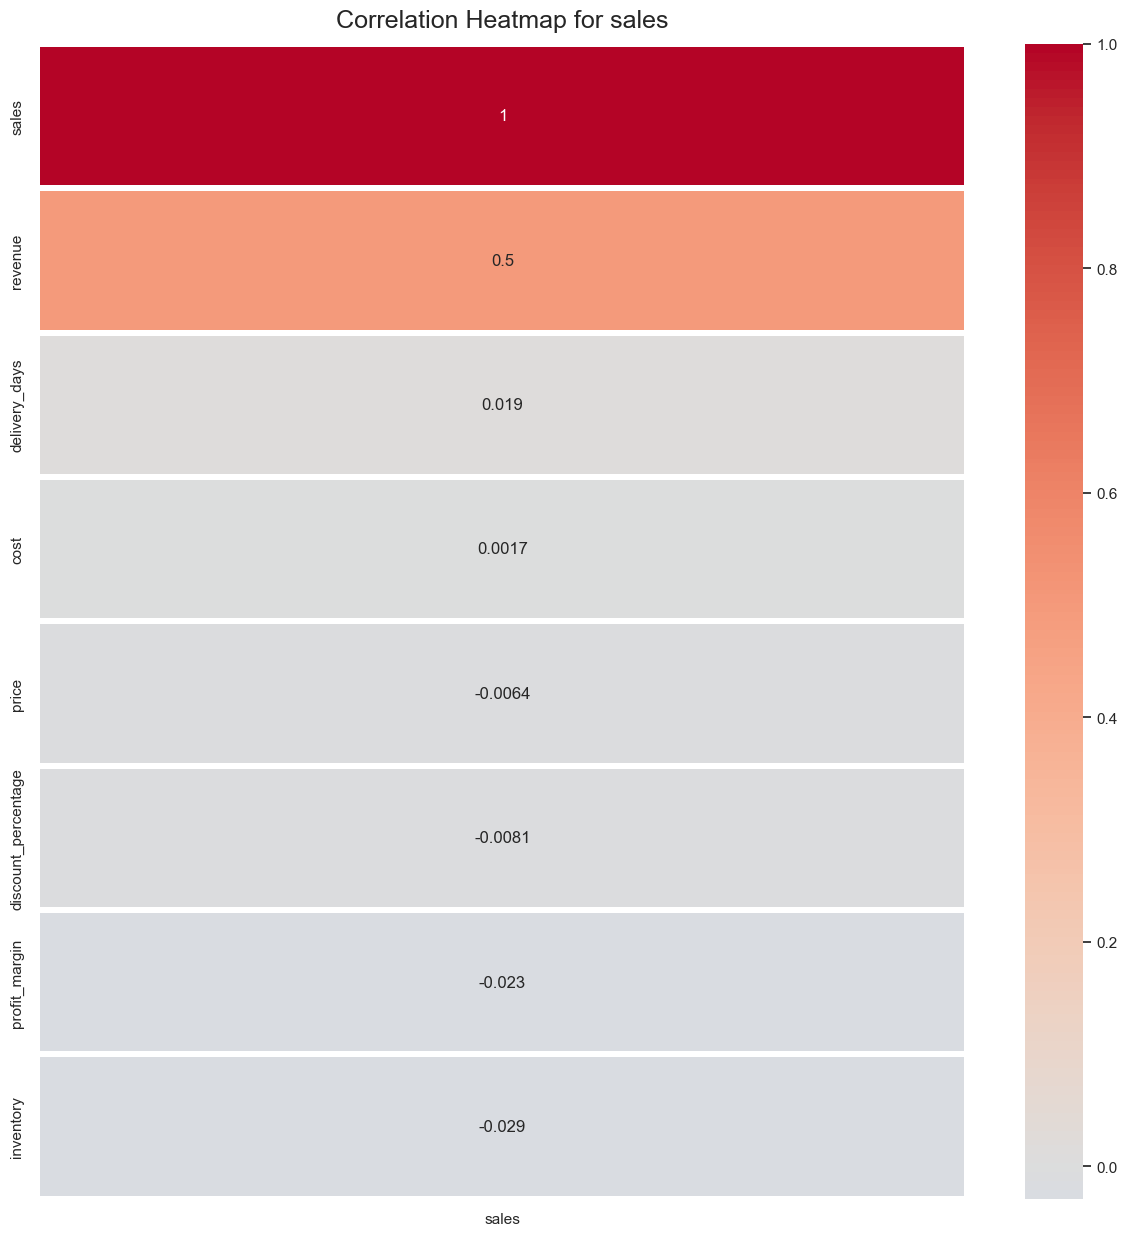

In [69]:
rf.corr_matrix(target=y_col)